<a href="https://colab.research.google.com/github/Adarsh2shark/Detecting-depression-using-tweets/blob/main/depression_through_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Task 1

In [2]:
import pandas as pd
import warnings

In [3]:
df = pd.read_csv("Sentiment Analysis Dataset 2.csv",sep=",",error_bad_lines=False)
original_df = pd.read_csv("Sentiment Analysis Dataset 2.csv",sep=",",error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'
b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [4]:
df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [5]:
df.isnull().sum()

ItemID             0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64

In [6]:
### Task 2

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
# PUNCTUATION REMOVAL

In [9]:

def removing_punctuation(text_data):
    after_removal="".join([i for i in text_data if i not in string.punctuation])
    return after_removal
#storing the puntuation free text
df['clean_msg'] = df['SentimentText'].apply(lambda x:removing_punctuation(x))


In [10]:
########################################## Lower Casing##############################################################
df['clean_msg']= df['clean_msg'].apply(lambda x: x.lower())
df.head(8)

,ItemID,Sentiment,SentimentSource,SentimentText,clean_msg
0,1,0,Sentiment140,is so sad for my APL frie...,is so sad for my apl friend
1,2,0,Sentiment140,I missed the New Moon trail...,i missed the new moon trailer
2,3,1,Sentiment140,omg its already 7:30 :O,omg its already 730 o
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry ive be...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me tt
5,6,0,Sentiment140,or i just worry too much?,or i just worry too much
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow ...


In [11]:
 #not saving this in df itself 
 df = df.drop(['ItemID','SentimentSource','SentimentText' ], axis=1)
 df.head()

,Sentiment,clean_msg
0,0,is so sad for my apl friend
1,0,i missed the new moon trailer
2,1,omg its already 730 o
3,0,omgaga im sooo im gunna cry ive be...
4,0,i think mi bf is cheating on me tt


In [12]:
############################################ Tokenization ############################################################
import re
#definig the function for tokenization work
def tokenization(text_data):
    tokens = re.split('\W+',text_data)
    return tokens

df['clean_tokensized']= df['clean_msg'].apply(lambda x: tokenization(x))
df.head()

,Sentiment,clean_msg,clean_tokensized
0,0,is so sad for my apl friend,"[, is, so, sad, for, my, apl, friend]"
1,0,i missed the new moon trailer,"[, i, missed, the, new, moon, trailer]"
2,1,omg its already 730 o,"[, omg, its, already, 730, o]"
3,0,omgaga im sooo im gunna cry ive be...,"[, omgaga, im, sooo, im, gunna, cry, ive, been..."
4,0,i think mi bf is cheating on me tt,"[, i, think, mi, bf, is, cheating, on, me, tt]"


In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
################################################### Stop words removal ########################################################
# creating function to apply this stop words
def remove_stopwords(text_data):
  output = [i for i in text_data if i not in stop_words]
  return output
df['no_stopwords'] = df['clean_tokensized'].apply(lambda x: remove_stopwords(x))



In [15]:
df.head()

,Sentiment,clean_msg,clean_tokensized,no_stopwords
0,0,is so sad for my apl friend,"[, is, so, sad, for, my, apl, friend]","[, sad, apl, friend]"
1,0,i missed the new moon trailer,"[, i, missed, the, new, moon, trailer]","[, missed, new, moon, trailer]"
2,1,omg its already 730 o,"[, omg, its, already, 730, o]","[, omg, already, 730]"
3,0,omgaga im sooo im gunna cry ive be...,"[, omgaga, im, sooo, im, gunna, cry, ive, been...","[, omgaga, im, sooo, im, gunna, cry, ive, dent..."
4,0,i think mi bf is cheating on me tt,"[, i, think, mi, bf, is, cheating, on, me, tt]","[, think, mi, bf, cheating, tt]"


In [16]:
##################################################### Stemming ###############################################################

In [17]:
# importing stemming function from nltk library
from nltk.stem.porter import PorterStemmer
# defining the object for stemming
porter_Stem = nltk.PorterStemmer()
def Stemming(text_data):
  text_stemmed=[porter_Stem.stem(word) for word in text_data]
  return text_stemmed

In [18]:
## defining a function for stemming
def Stemming(text_data):
  stemming_text = [porter_Stem.stem(word) for word in text_data]
  return stemming_text
df['stemming_data'] = df['no_stopwords'].apply(lambda x:Stemming(x))

In [19]:
df.head()

,Sentiment,clean_msg,clean_tokensized,no_stopwords,stemming_data
0,0,is so sad for my apl friend,"[, is, so, sad, for, my, apl, friend]","[, sad, apl, friend]","[, sad, apl, friend]"
1,0,i missed the new moon trailer,"[, i, missed, the, new, moon, trailer]","[, missed, new, moon, trailer]","[, miss, new, moon, trailer]"
2,1,omg its already 730 o,"[, omg, its, already, 730, o]","[, omg, already, 730]","[, omg, alreadi, 730]"
3,0,omgaga im sooo im gunna cry ive be...,"[, omgaga, im, sooo, im, gunna, cry, ive, been...","[, omgaga, im, sooo, im, gunna, cry, ive, dent...","[, omgaga, im, sooo, im, gunna, cri, ive, dent..."
4,0,i think mi bf is cheating on me tt,"[, i, think, mi, bf, is, cheating, on, me, tt]","[, think, mi, bf, cheating, tt]","[, think, mi, bf, cheat, tt]"


In [20]:
######################################################## Lemmatization #########################################################

In [21]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#creating object for using lemmatizer
wordnet_lemmatizer_object  = nltk.WordNetLemmatizer()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [22]:
wordnet_lemmatizer_object  = nltk.WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer_object.lemmatize(word) for word in text]
  return lemm_text


In [23]:
df['msg_lemmatized'] = df['no_stopwords'].apply(lambda x: lemmatizer(x))

In [24]:
df['msg_lemmatized'] = df['msg_lemmatized'].agg(lambda x: ' '.join(map(str,x)))


In [25]:
df.head()

,Sentiment,clean_msg,clean_tokensized,no_stopwords,stemming_data,msg_lemmatized
0,0,is so sad for my apl friend,"[, is, so, sad, for, my, apl, friend]","[, sad, apl, friend]","[, sad, apl, friend]",sad apl friend
1,0,i missed the new moon trailer,"[, i, missed, the, new, moon, trailer]","[, missed, new, moon, trailer]","[, miss, new, moon, trailer]",missed new moon trailer
2,1,omg its already 730 o,"[, omg, its, already, 730, o]","[, omg, already, 730]","[, omg, alreadi, 730]",omg already 730
3,0,omgaga im sooo im gunna cry ive be...,"[, omgaga, im, sooo, im, gunna, cry, ive, been...","[, omgaga, im, sooo, im, gunna, cry, ive, dent...","[, omgaga, im, sooo, im, gunna, cri, ive, dent...",omgaga im sooo im gunna cry ive dentist since...
4,0,i think mi bf is cheating on me tt,"[, i, think, mi, bf, is, cheating, on, me, tt]","[, think, mi, bf, cheating, tt]","[, think, mi, bf, cheat, tt]",think mi bf cheating tt


In [26]:
#################################################################################################################################
#################################################  TASK 3  ######################################################################
#################################################################################################################################

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df_twt = pd.DataFrame(columns=['tweet', 'labels'])
df_twt['tweet'] = df['msg_lemmatized']
df_twt['labels']=df['Sentiment']
df_twt.head()

,tweet,labels
0,sad apl friend,0
1,missed new moon trailer,0
2,omg already 730,1
3,omgaga im sooo im gunna cry ive dentist since...,0
4,think mi bf cheating tt,0


In [29]:
############ word cloud from overall data set ####################

In [30]:
df_twt.groupby('labels').describe()
df_twt.shape
df_twt.describe

<bound method NDFrame.describe of                                                      tweet  labels
0                                           sad apl friend       0
1                                  missed new moon trailer       0
2                                          omg already 730       1
3         omgaga im sooo im gunna cry ive dentist since...       0
4                                  think mi bf cheating tt       0
...                                                    ...     ...
1578607                      zzzzzz finally night tweeter        1
1578608                         zzzzzzz sleep well people        1
1578609                          zzzzzzzzzz wait homework        0
1578610                                 zzzzzzzzzzzzz meh        0
1578611                          zzzzzzzzzzzzzzzzzzz wish        0

[1578612 rows x 2 columns]>

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector_object = CountVectorizer(stop_words = 'english')
words = count_vector_object.fit_transform(df_twt.tweet)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

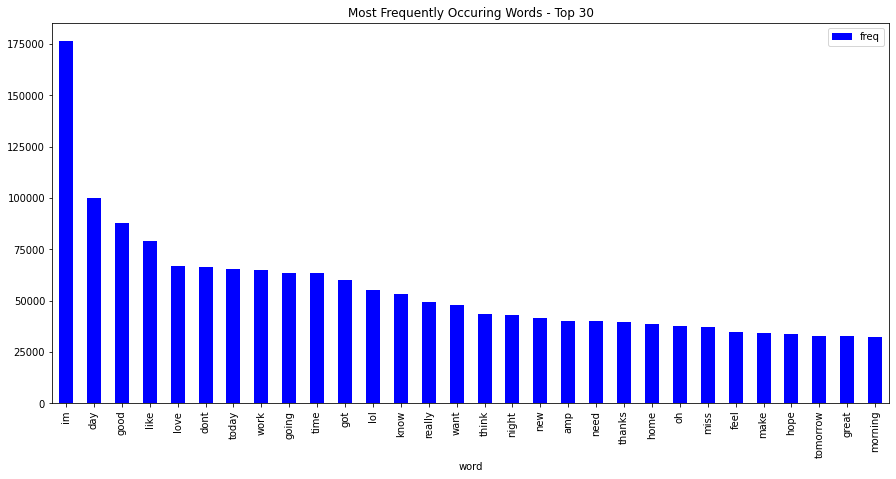

In [32]:
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in count_vector_object.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

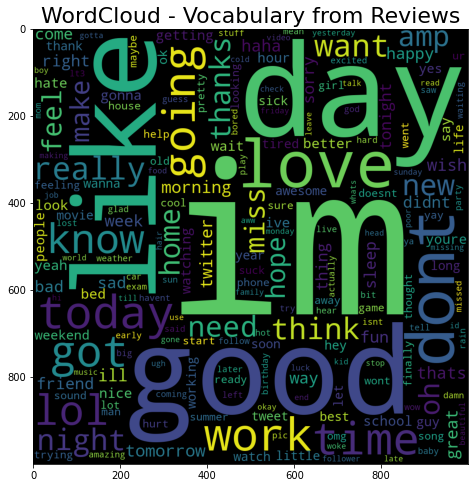

In [33]:
################ word cloud

from wordcloud import WordCloud
word_cloud = WordCloud( width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [34]:
#seperating out positive sentiments from original data
positive_twt = df_twt[df_twt['labels'] == 1]
positive_twt.head()

,tweet,labels
2,omg already 730,1
6,juuuuuuuuuuuuuuuuussssst chillin,1
8,handed uniform today miss already,1
9,hmmmm wonder number,1
11,thanks hater face day 112102,1


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

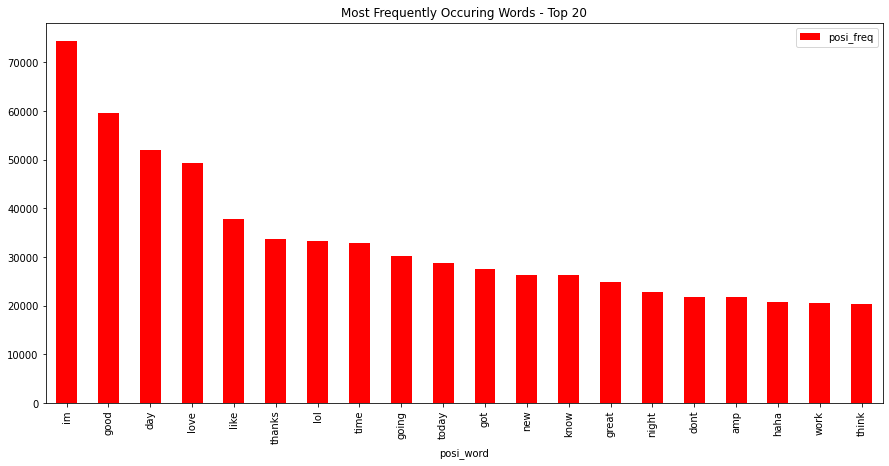

In [35]:
posi_count_vector_object = CountVectorizer(stop_words = 'english')
words = posi_count_vector_object.fit_transform(positive_twt.tweet)


posi_sum_words = words.sum(axis=0)

posi_words_freq = [(new_word, posi_sum_words[0, y]) for new_word, y in posi_count_vector_object.vocabulary_.items()]
posi_words_freq = sorted(posi_words_freq, key = lambda x: x[1], reverse = True)

posi_frequency = pd.DataFrame(posi_words_freq, columns=['posi_word', 'posi_freq'])

posi_frequency.head(20).plot(x='posi_word', y='posi_freq', kind='bar', figsize=(15, 7), color = 'red')
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'posi_word_cloud - Vocabulary from Reviews')

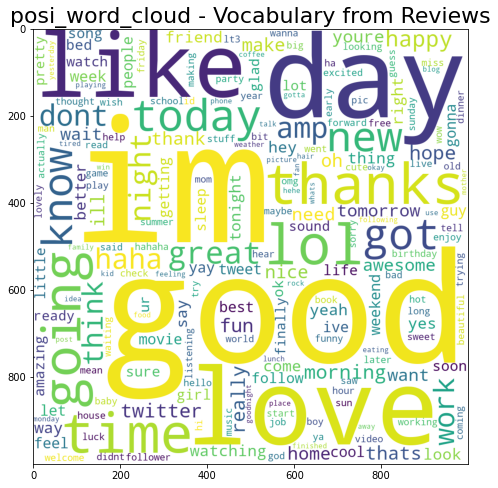

In [36]:
posi_word_cloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(posi_words_freq))
plt.figure(figsize=(10,8))
plt.imshow(posi_word_cloud)
plt.title("posi_word_cloud - Vocabulary from Reviews", fontsize = 22)

In [37]:
#seperating out negative sentiments from original data
negative_twt = df_twt[df_twt['labels'] == 0]
negative_twt.head()

,tweet,labels
0,sad apl friend,0
1,missed new moon trailer,0
3,omgaga im sooo im gunna cry ive dentist since...,0
4,think mi bf cheating tt,0
5,worry much,0


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

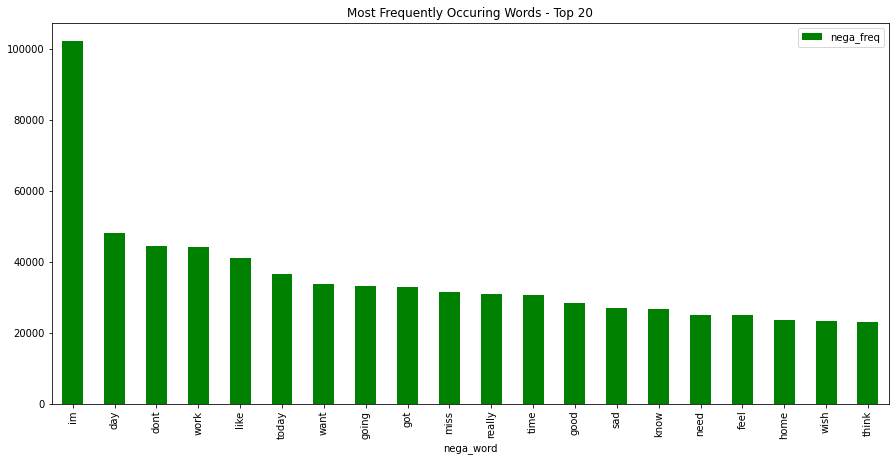

In [38]:
nega_count_vector_object = CountVectorizer(stop_words = 'english')
words = nega_count_vector_object.fit_transform(negative_twt.tweet)


nega_sum_words = words.sum(axis=0)

nega_words_freq = [(new_new_word, nega_sum_words[0, z]) for new_new_word, z in nega_count_vector_object.vocabulary_.items()]
nega_words_freq = sorted(nega_words_freq, key = lambda x: x[1], reverse = True)

nega_frequency = pd.DataFrame(nega_words_freq, columns=['nega_word', 'nega_freq'])

nega_frequency.head(20).plot(x='nega_word', y='nega_freq', kind='bar', figsize=(15, 7), color = 'green')
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'nega_word_cloud - Vocabulary from Reviews')

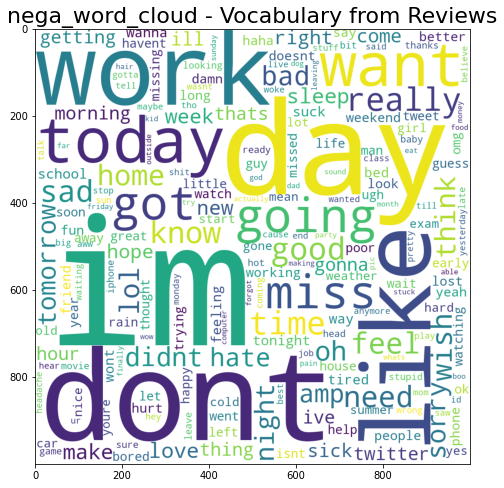

In [39]:
nega_word_cloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(nega_words_freq))
plt.figure(figsize=(10,8))
plt.imshow(nega_word_cloud)
plt.title("nega_word_cloud - Vocabulary from Reviews", fontsize = 22)

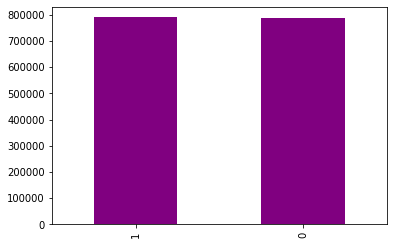

In [50]:
df_twt['labels'].value_counts().plot.bar(color = 'purple', figsize = (6, 4))

In [51]:
df_twt['len'] = df_twt['tweet'].str.len()
df_twt['len_of_words']=df_twt['tweet'].str.count(' ')

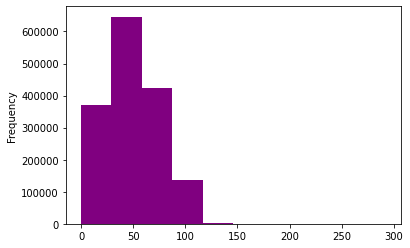

In [52]:
length_tweet = df_twt['tweet'].str.len().plot.hist(color = 'purple', figsize = (6, 4))

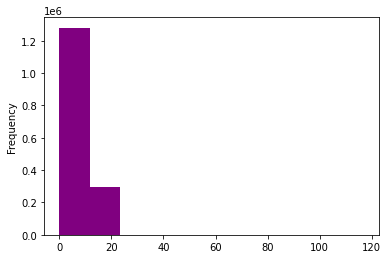

In [53]:
length_tweet_words = df_twt['len_of_words'].plot.hist(color = 'purple', figsize = (6, 4))

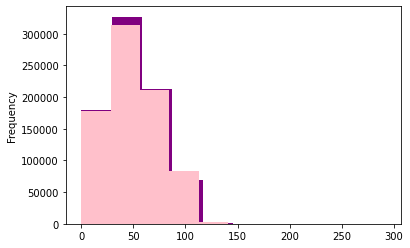

In [56]:
length_tweet_class_wise = df_twt['len'][df_twt['labels'] == 1].plot.hist(color = 'purple', figsize = (6, 4))
length_tweet_class_wise = df_twt['len'][df_twt['labels'] == 0].plot.hist(color = 'pink', figsize = (6, 4))

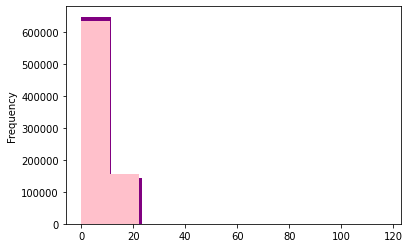

In [57]:
length_tweet_words_class_wise = df_twt['len_of_words'][df_twt['labels'] == 1].plot.hist(color = 'purple', figsize = (6, 4))
length_tweet_words_class_wise = df_twt['len_of_words'][df_twt['labels'] == 0].plot.hist(color = 'pink', figsize = (6, 4))

In [58]:
df_twt.groupby('labels').describe()

len                                                      \
           count       mean        std  min   25%   50%   75%    max   
labels                                                                 
0       788435.0  49.995955  24.566821  0.0  30.0  47.0  69.0  282.0   
1       790177.0  50.812953  24.473594  0.0  31.0  47.0  69.0  292.0   

       len_of_words                                                  
              count      mean       std  min  25%  50%   75%    max  
labels                                                               
0          788435.0  7.745829  4.005809  0.0  5.0  7.0  11.0  111.0  
1          790177.0  7.558391  3.988306  0.0  4.0  7.0  10.0  117.0

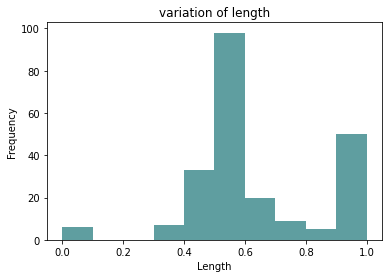

In [64]:
df_twt.groupby('len').mean()['labels'].plot.hist(color = 'cadetblue', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

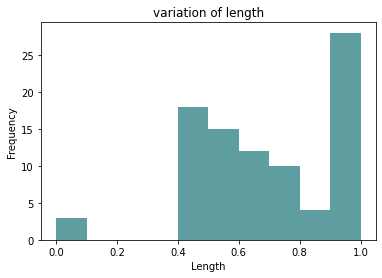

In [65]:
df_twt.groupby('len_of_words').mean()['labels'].plot.hist(color = 'cadetblue', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()